#Gather and Clean the Data

In [1]:
#installing all the libraries since I code on Colab, ignore this part if you are doing it on jupyterlab/VSCode
!pip install alpaca-trade-api
!pip install pandas
!pip install pandas_ta
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 6.6 MB/s eta 0:00:00
  Created wheel for msgpack: filename=msgpack-1.0.3-cp311-cp311-linux_x86_64.whl size=15688 sha256=7745a160202d0c0d7f354f5d9a941518c4e428c493c9f54d410a4a5b22719b7c
  Stored in directory: /root/.cache/pip/wheels/f6/35/da/ed9b26b510235e00e3a3c3bab7bad97b59214729662255ab3d
Successfully built msgpack
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.1.0
    Uninstalling msgpack-1.1.0:
      Successfully uninstalled msgpack-1.1.0
  Attempting uninstall: websockets
    Found existing installation: websockets 14.2
    Uninstalling w

In [2]:
#importing the libraries installed
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf

In [16]:
#Loading Alpaca API keys
API_Key = "PKRFUQSXUDG18L40J1VG" #Nathan's Key
API_secret_key = "2XAyzllnBZhxY8BSv8o1xkfzw3pHgIIbQsGwr7jp" #Nathan's secret Key
API_base_url = "https://paper-api.alpaca.markets" #(for live account trading, just remove the 'paper' from this link and it would work the same)

In [17]:
#initializing Alpaca API on our collab environment
api = tradeapi.REST(API_Key, API_secret_key, API_base_url, api_version='v2')

In [38]:
#function to fetch historical data with a date range from January 1st 2021 to February 1st 2025

def fetch_data(symbol, start, end, timeframe='1D'):
  start = '2021-01-01'
  end = '2025-02-01'
  barset = api.get_bars(symbol, timeframe, start=start, end=end, feed = 'iex')
  bars = list(barset)
  return bars

In [39]:
#Get Vanguard Info
bars = fetch_data('VOO', '2025-01-01', '2025-02-01')
print(bars)

[Bar({   'c': 296.98,
    'h': 297.09,
    'l': 295.2,
    'n': 196,
    'o': 295.2,
    't': '2020-07-27T04:00:00Z',
    'v': 18587,
    'vw': 296.546273}), Bar({   'c': 295.19,
    'h': 297.27,
    'l': 295.12,
    'n': 629,
    'o': 295.82,
    't': '2020-07-28T04:00:00Z',
    'v': 62785,
    'vw': 296.473688}), Bar({   'c': 298.62,
    'h': 299.18,
    'l': 295.985,
    'n': 131,
    'o': 295.985,
    't': '2020-07-29T04:00:00Z',
    'v': 13894,
    'vw': 298.156579}), Bar({   'c': 297.555,
    'h': 298.02,
    'l': 293.93,
    'n': 109,
    'o': 296.015,
    't': '2020-07-30T04:00:00Z',
    'v': 9667,
    'vw': 296.285287}), Bar({   'c': 300,
    'h': 300,
    'l': 295.45,
    'n': 315,
    'o': 299.46,
    't': '2020-07-31T04:00:00Z',
    'v': 34447,
    'vw': 297.759687}), Bar({   'c': 302.17,
    'h': 302.76,
    'l': 301.375,
    'n': 145,
    'o': 301.68,
    't': '2020-08-03T04:00:00Z',
    'v': 19417,
    'vw': 301.979523}), Bar({   'c': 303.06,
    'h': 303.06,
    'l': 30

In [40]:
data = {
    'Date': [bar.t for bar in bars],
    'Open': [bar.o for bar in bars],
    'High': [bar.h for bar in bars],
    'Low': [bar.l for bar in bars],
    'Close': [bar.c for bar in bars],
    'Volume': [bar.v for bar in bars]
}

In [41]:
#creating dataframe and setting index
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-27 00:00:00-04:00,295.200,297.090,295.200,296.980,18587
2020-07-28 00:00:00-04:00,295.820,297.270,295.120,295.190,62785
2020-07-29 00:00:00-04:00,295.985,299.180,295.985,298.620,13894
2020-07-30 00:00:00-04:00,296.015,298.020,293.930,297.555,9667
2020-07-31 00:00:00-04:00,299.460,300.000,295.450,300.000,34447
...,...,...,...,...,...
2025-01-27 00:00:00-05:00,546.930,551.090,546.920,551.090,74620
2025-01-28 00:00:00-05:00,552.305,556.570,549.665,555.890,42878
2025-01-29 00:00:00-05:00,555.120,555.200,551.160,553.140,46218


In [42]:
#Get the dtypes
df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


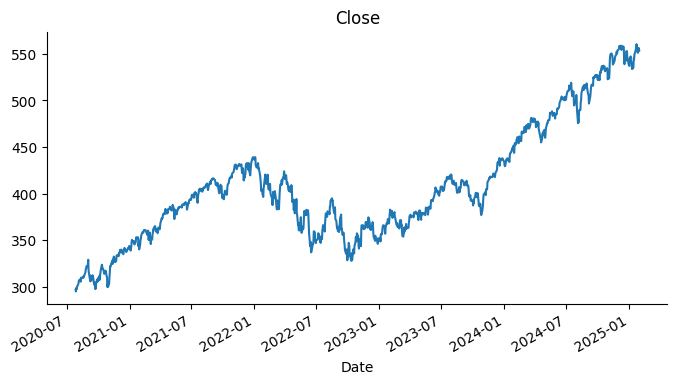

In [43]:
#graph the date and closing numbers

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

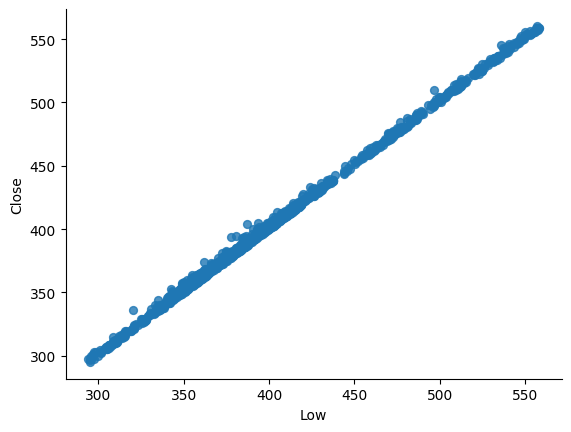

In [44]:
#track the low and closing prices
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

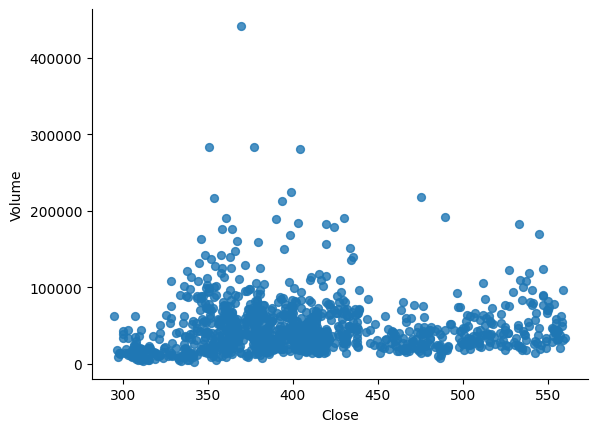

In [45]:
#tracking volume and closing shares
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

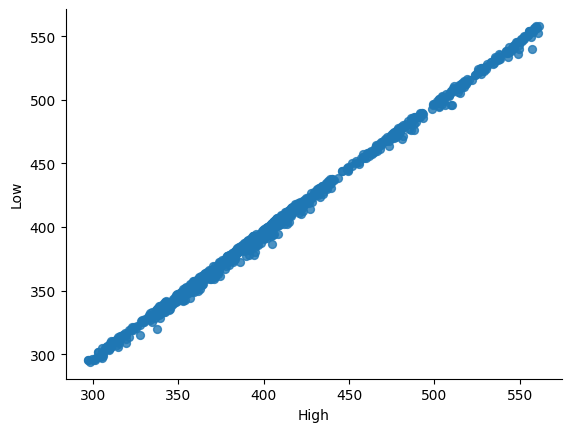

In [46]:
#test graph for fun (low vs. high)
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)